<a href="https://colab.research.google.com/github/mehedibme/EDGEIUICT-PROJECT--/blob/main/gold_price_prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

 Load the Dataset

In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ML_EDGEIUICT-210_PROJECT/gld_price_data.csv', parse_dates=['Date'])
print(data.head())

        Date          SPX        GLD        USO     SLV   EUR/USD
0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099


 Data Preprocessing

In [6]:
# Check for missing values
print(data.isnull().sum())

#Feature Selection
# Drop the 'Date' column and select features and target variable
X = data.drop(['Date', 'GLD'], axis=1)  # Assuming 'GLD' is the target variable
y = data['GLD']

#Train-Test Split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


Model Training

In [7]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 5.469544524374734
R-squared Score: 0.9900245384549384


 Visualizing Predictions

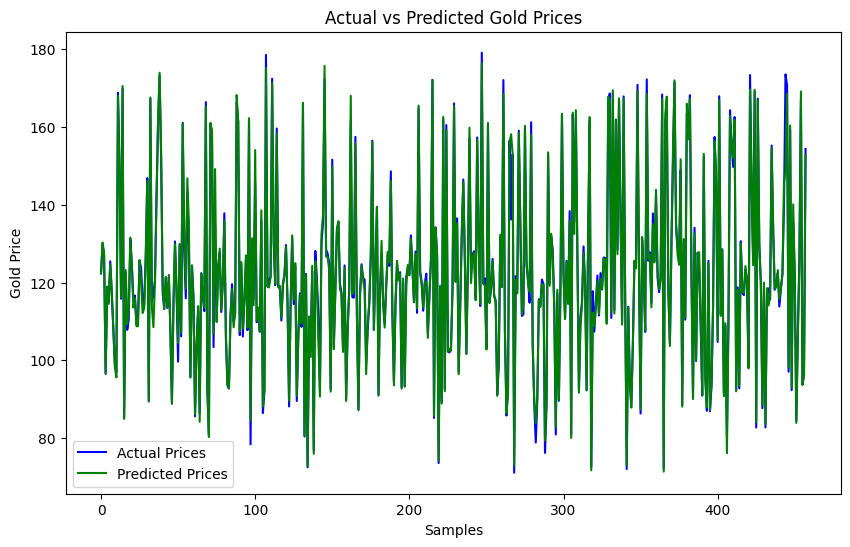

In [9]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='green')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Samples')
plt.ylabel('Gold Price')
plt.legend()
plt.show()